<a href="https://colab.research.google.com/github/brasilemnumeros/dados/blob/main/Selic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selic Mensal
Analisar a evolução histórica da taxa Selic nos últimos 30 anos, incluindo a coleta, carregamento, pré-processamento e visualização dos dados.**negrito**

## Coleta de dados

### Subtask:
Buscar uma fonte confiável de dados históricos da taxa Selic.


**Reasoning**:
Search for reliable data sources for the Selic rate history and identify the access method and data format.



In [1]:
%pip install python-bcb

## Coleta de dados em partes

### Subtask:
Coletar os dados históricos da taxa Selic em múltiplos períodos de 5 anos usando o pacote `python-bcb`.


In [2]:
from bcb import sgs
import pandas as pd
from datetime import datetime, timedelta

# Define the end date as today
end_date = datetime.now()

# Define the start date for the last 30 years
start_date_overall = end_date - timedelta(days=30 * 365) # Approximate 30 years

# List to store dataframes for each 5-year period
dfs_selic = []

# Define the period length in years
period_years = 5

# Loop through 5-year periods backwards from the end date
current_end_date = end_date
while current_end_date > start_date_overall:
    current_start_date = max(start_date_overall, current_end_date - timedelta(days=period_years * 365))

    print(f"Attempting to retrieve data from {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")

    try:
        # Use the bcb.sgs.get() function to retrieve the series data for the current period
        df_period = sgs.get(('selic', 432), start=current_start_date.strftime('%Y-%m-%d'), end=current_end_date.strftime('%Y-%m-%d'))

        if not df_period.empty:
            print(f"Data retrieved for the period: {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")
            dfs_selic.append(df_period)
        else:
            print(f"No data retrieved for the period: {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}")

    except Exception as e:
        print(f"An error occurred while retrieving data for the period {current_start_date.strftime('%Y-%m-%d')} to {current_end_date.strftime('%Y-%m-%d')}: {e}")

    # Set the end date for the next period
    current_end_date = current_start_date - timedelta(days=1) # Start the next period the day before

print(f"Collected {len(dfs_selic)} dataframes for different periods.")

Attempting to retrieve data from 2020-07-28 to 2025-07-27
Data retrieved for the period: 2020-07-28 to 2025-07-27
Attempting to retrieve data from 2015-07-29 to 2020-07-27
Data retrieved for the period: 2015-07-29 to 2020-07-27
Attempting to retrieve data from 2010-07-29 to 2015-07-28
Data retrieved for the period: 2010-07-29 to 2015-07-28
Attempting to retrieve data from 2005-07-29 to 2010-07-28
Data retrieved for the period: 2005-07-29 to 2010-07-28
Attempting to retrieve data from 2000-07-29 to 2005-07-28
Data retrieved for the period: 2000-07-29 to 2005-07-28
Attempting to retrieve data from 1995-08-04 to 2000-07-28
Data retrieved for the period: 1995-08-04 to 2000-07-28
Collected 6 dataframes for different periods.


## Combinar os dados coletados

### Subtask:
Juntar os DataFrames de cada período em um único DataFrame.

In [3]:
# Check if the list of dataframes is not empty
if dfs_selic:
    # Concatenate all dataframes in the list
    # sort_index() is important to ensure the combined dataframe is in chronological order
    df_selic_combined = pd.concat(dfs_selic).sort_index()

    print("DataFrames combinados com sucesso!")
    print("\nInformações do DataFrame combinado:")
    df_selic_combined.info()

    print("\nPrimeiras 5 linhas do DataFrame combinado:")
    display(df_selic_combined.head())

    print("\nÚltimas 5 linhas do DataFrame combinado:")
    display(df_selic_combined.tail())

else:
    print("A lista de DataFrames está vazia. Não há dados para combinar.")
    df_selic_combined = None

DataFrames combinados com sucesso!

Informações do DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9642 entries, 1999-03-05 to 2025-07-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   selic   9642 non-null   float64
dtypes: float64(1)
memory usage: 150.7 KB

Primeiras 5 linhas do DataFrame combinado:


,selic
Date,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0



Últimas 5 linhas do DataFrame combinado:


,selic
Date,
2025-07-23,15.0
2025-07-24,15.0
2025-07-25,15.0
2025-07-26,15.0
2025-07-27,15.0


## Pré-processamento e Consolidação dos dados

### Subtask:
Limpar, formatar e consolidar os dados para uma granularidade menor (por exemplo, mensal ou anual).

In [4]:
# Check if the combined DataFrame exists
if df_selic_combined is None:
    print("Error: O DataFrame combinado não foi carregado na etapa anterior.")
else:
    # Check data types and missing values before consolidation
    print("Informações do DataFrame combinado antes da consolidação:")
    df_selic_combined.info()

    print("\nValores ausentes antes da consolidação:")
    print(df_selic_combined.isnull().sum())

    # Rename the column for clarity before consolidation if not already done (should be 'selic' from bcb)
    if 'selic' in df_selic_combined.columns:
         df_selic_combined.rename(columns={'selic': 'Taxa Selic (%)'}, inplace=True)
    # If already renamed in a previous attempt, this will do nothing, which is fine.

    # Consolidate the data to a monthly frequency
    # We'll take the mean of the daily rates within each month as the monthly rate
    df_selic_monthly = df_selic_combined['Taxa Selic (%)'].resample('M').mean()

    print("\nInformações do DataFrame mensal consolidado:")
    df_selic_monthly.info()

    print("\nPrimeiras 5 linhas do DataFrame mensal consolidado:")
    display(df_selic_monthly.head())

    print("\nÚltimas 5 linhas do DataFrame mensal consolidado:")
    display(df_selic_monthly.tail())

Informações do DataFrame combinado antes da consolidação:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9642 entries, 1999-03-05 to 2025-07-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   selic   9642 non-null   float64
dtypes: float64(1)
memory usage: 150.7 KB

Valores ausentes antes da consolidação:
selic    0
dtype: int64

Informações do DataFrame mensal consolidado:
<class 'pandas.core.series.Series'>
DatetimeIndex: 317 entries, 1999-03-31 to 2025-07-31
Freq: ME
Series name: Taxa Selic (%)
Non-Null Count  Dtype  
--------------  -----  
317 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB

Primeiras 5 linhas do DataFrame mensal consolidado:


/tmp/ipython-input-4-2485159067.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_selic_monthly = df_selic_combined['Taxa Selic (%)'].resample('M').mean()


,Taxa Selic (%)
Date,
1999-03-31,44.222222
1999-04-30,36.850000
1999-05-31,27.338710
1999-06-30,22.166667
1999-07-31,20.854839



Últimas 5 linhas do DataFrame mensal consolidado:


,Taxa Selic (%)
Date,
2025-03-31,13.637097
2025-04-30,14.250000
2025-05-31,14.637097
2025-06-30,14.850000
2025-07-31,15.000000


## Análise Exploratória

### Subtask:
Realizar uma análise inicial dos dados consolidados para entender sua estrutura e características.

In [5]:
# Display basic information about the monthly DataFrame
print("Informações do DataFrame mensal consolidado:")
df_selic_monthly.info()

# Display descriptive statistics for the monthly Selic rate
print("\nEstatísticas Descritivas da Taxa Selic Mensal:")
print(df_selic_monthly.describe())

# Check the date range of the monthly data
min_date_monthly = df_selic_monthly.index.min()
max_date_monthly = df_selic_monthly.index.max()
print(f"\nPeríodo dos dados mensais: {min_date_monthly.strftime('%Y-%m-%d')} a {max_date_monthly.strftime('%Y-%m-%d')}")

# Display the first and last few rows of the monthly data
print("\nPrimeiras 5 linhas do DataFrame mensal:")
display(df_selic_monthly.head())

print("\nÚltimas 5 linhas do DataFrame mensal:")
display(df_selic_monthly.tail())

Informações do DataFrame mensal consolidado:
<class 'pandas.core.series.Series'>
DatetimeIndex: 317 entries, 1999-03-31 to 2025-07-31
Freq: ME
Series name: Taxa Selic (%)
Non-Null Count  Dtype  
--------------  -----  
317 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB

Estatísticas Descritivas da Taxa Selic Mensal:
count    317.000000
mean      12.727294
std        5.520582
min        2.000000
25%        9.250000
50%       12.266667
75%       16.000000
max       44.222222
Name: Taxa Selic (%), dtype: float64

Período dos dados mensais: 1999-03-31 a 2025-07-31

Primeiras 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
1999-03-31,44.222222
1999-04-30,36.850000
1999-05-31,27.338710
1999-06-30,22.166667
1999-07-31,20.854839



Últimas 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
2025-03-31,13.637097
2025-04-30,14.250000
2025-05-31,14.637097
2025-06-30,14.850000
2025-07-31,15.000000


## Visualização

### Subtask:
Criar um gráfico para visualizar a evolução histórica da taxa Selic ao longo do tempo.

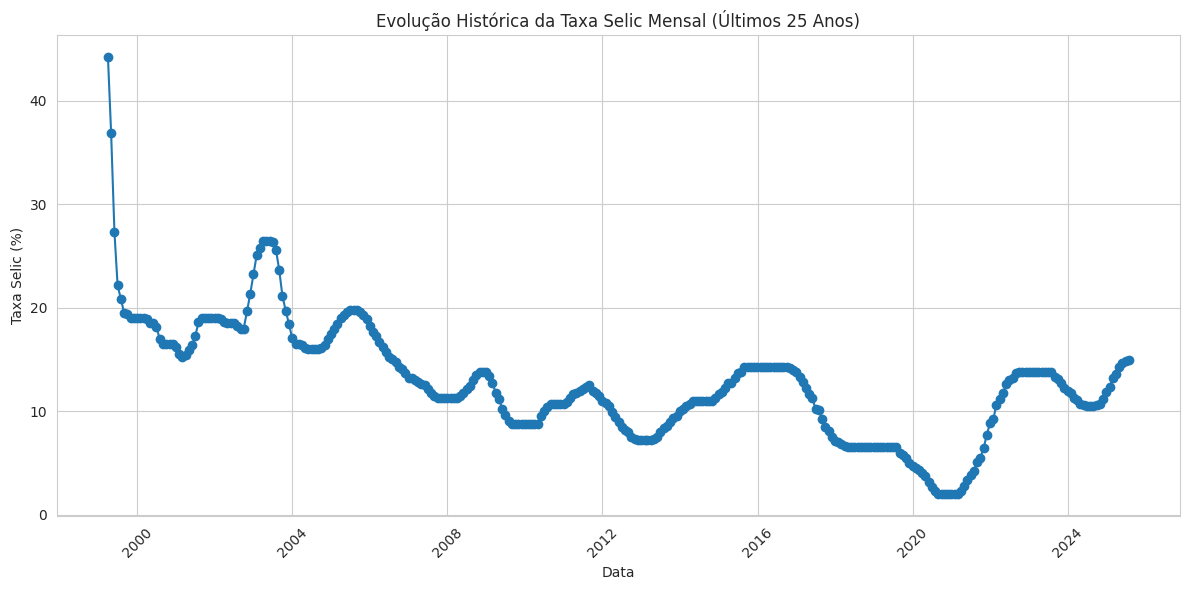

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_selic_monthly.index, df_selic_monthly.values, marker='o', linestyle='-')

# Add titles and labels
plt.title('Evolução Histórica da Taxa Selic Mensal (Últimos 25 Anos)')
plt.xlabel('Data')
plt.ylabel('Taxa Selic (%)')

# Improve date formatting on the x-axis
plt.xticks(rotation=45)
plt.tight_layout() # Adjust layout to prevent labels overlapping

# Display the plot
plt.show()

In [7]:
# Check the frequency of the index
print("Frequência do índice do DataFrame mensal:")
print(df_selic_monthly.index.freq)

# Check the number of data points in the monthly DataFrame
print("\nNúmero total de pontos de dados no DataFrame mensal:", len(df_selic_monthly))

# Calculate the number of years covered by the data
min_date = df_selic_monthly.index.min()
max_date = df_selic_monthly.index.max()
number_of_years = (max_date.year - min_date.year) + (max_date.month - min_date.month) / 12
print(f"\nPeríodo coberto (aproximado em anos): {number_of_years:.2f}")

# Approximate expected number of monthly points
expected_monthly_points = number_of_years * 12
print(f"Número esperado de pontos mensais (aproximado): {expected_monthly_points:.0f}")

# Check the first and last few rows again to confirm dates
print("\nPrimeiras 5 linhas do DataFrame mensal:")
display(df_selic_monthly.head())

print("\nÚltimas 5 linhas do DataFrame mensal:")
display(df_selic_monthly.tail())

Frequência do índice do DataFrame mensal:
<MonthEnd>

Número total de pontos de dados no DataFrame mensal: 317

Período coberto (aproximado em anos): 26.33
Número esperado de pontos mensais (aproximado): 316

Primeiras 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
1999-03-31,44.222222
1999-04-30,36.850000
1999-05-31,27.338710
1999-06-30,22.166667
1999-07-31,20.854839



Últimas 5 linhas do DataFrame mensal:


,Taxa Selic (%)
Date,
2025-03-31,13.637097
2025-04-30,14.250000
2025-05-31,14.637097
2025-06-30,14.850000
2025-07-31,15.000000


In [10]:
import json

# Prepare the data for JSON
# The index of df_selic_monthly is the Date, and the values are the Selic rates.
# We need to convert the index (datetime objects) to string format 'YYYY-MM-DD'.
# We also need to rename the value column for clarity in the JSON.

# Create a list of dictionaries, one for each data point
data_list = []
for index, value in df_selic_monthly.items():
    data_list.append({
        "date": index.strftime('%Y-%m-%d'), # Format date as YYYY-MM-DD
        "rate": value # Use the Selic rate value
    })

# Create the final dictionary structure
json_output = {
    "indicatorName": "Taxa SELIC (%)", # Use the indicator name as requested
    "data": data_list
}

# Define the output file path
output_file_path = 'selic_mensal.json'

# Save the dictionary to a JSON file with indentation for readability
with open(output_file_path, 'w') as f:
    json.dump(json_output, f, indent=4)

print(f"Dados da Taxa Selic mensal formatados e salvos em '{output_file_path}'")

Dados da Taxa Selic mensal formatados e salvos em 'selic_mensal.json'
